In [30]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np

In [31]:
x, y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=17)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

Text(0.5, 1.0, 'Initial data')

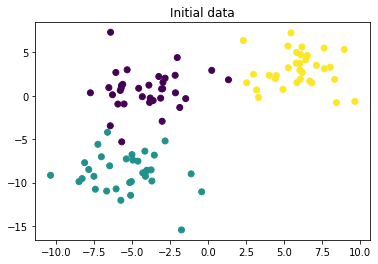

In [34]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('Initial data')

In [35]:
x0, x1 = 1.6, 3.1

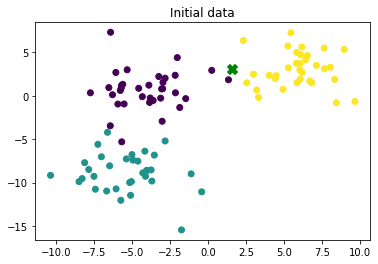

In [36]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.title('Initial data')
plt.scatter(x0, x1, s = 100, c='g', marker='X');

In [37]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y);

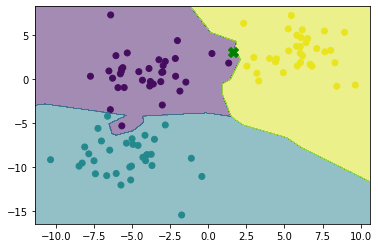

In [40]:
clf.fit(x,y)

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)


plt.scatter(x[:,0], x[:,1], c=y)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x0, x1, s=100, c='g', marker='X');

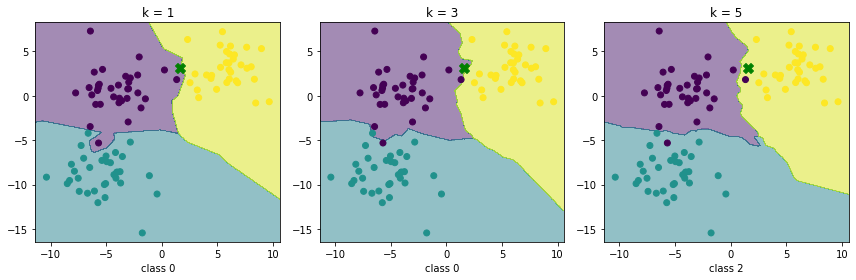

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x0, x1, s=100, c='g', marker='X');
c = clf.predict([[x0, x1]])
plt.title('k = 1')
plt.xlabel(f'class {c[0]}')


plt.subplot(132)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x0, x1, s=100, c='g', marker='X');
c = clf.predict([[x0, x1]])
plt.title('k = 3')
plt.xlabel(f'class {c[0]}')


plt.subplot(133)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x0, x1, s=100, c='g', marker='X');
c = clf.predict([[x0, x1]])
plt.title('k = 5')
plt.xlabel(f'class {c[0]}')

plt.tight_layout();


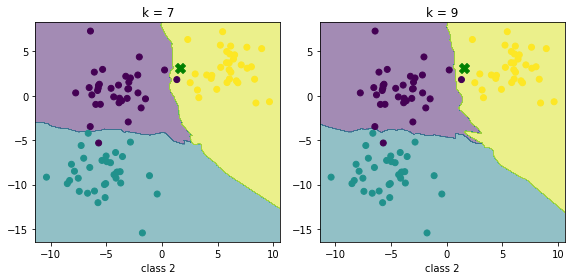

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x0, x1, s=100, c='g', marker='X');
c = clf.predict([[x0, x1]])
plt.title('k = 7')
plt.xlabel(f'class {c[0]}')


plt.subplot(132)
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.5)
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x0, x1, s=100, c='g', marker='X');
c = clf.predict([[x0, x1]])
plt.title('k = 9')
plt.xlabel(f'class {c[0]}')
plt.tight_layout();

In [60]:
distances = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        distances[i, j] = np.sqrt(np.sum((x[i] - x[j]) ** 2))

Проверяем качество классификации для различных параметров k (1, 3, 5, 7, 9) метрикой Accuracy:

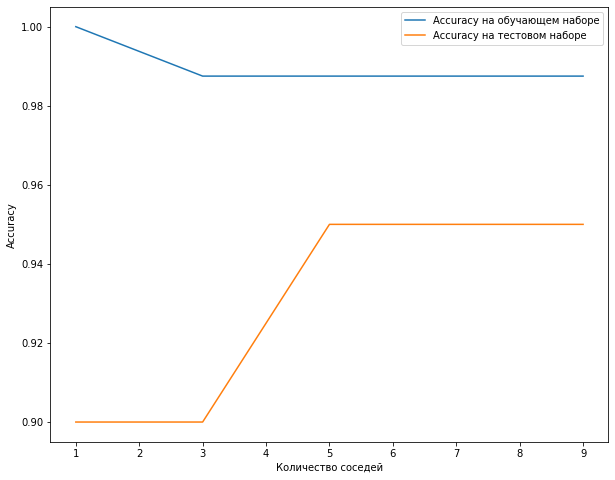

In [79]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11, 2)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    

plt.figure(figsize=(10,8))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy на тестовом наборе")
plt.ylabel("Accuracy")
plt.xlabel("Количество соседей")
plt.legend();


Проверяем качество классификации для различных параметров k (1, 3, 5, 7, 9) метрикой Accuracy, используя Евклидову меру:


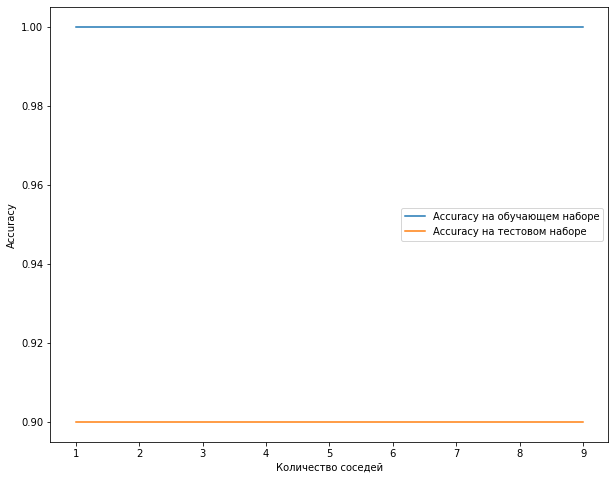

In [82]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11, 2)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights ='distance')
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    

plt.figure(figsize=(10,8))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy на тестовом наборе")
plt.ylabel("Accuracy")
plt.xlabel("Количество соседей")
plt.legend();